## Практика 7: Метод головних компонент

### Приклад 12.2.1 Rencher. 

В  таблиці наведені вимірювання параметрів голови (довжина та ширина щелепа) для першого (колонки $V1$ та $V2$) та другого  (відповідно, колонки $V3$ та  $V4$)  синів в родині. 

In [1]:
# install.packages("ggplot2")
library('ggplot2')

also installing the dependencies 'cli', 'lifecycle', 'rlang', 'scales', 'vctrs'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
cli        2.5.0  3.6.1              TRUE
lifecycle  1.0.0  1.0.3             FALSE
rlang     0.4.11  1.1.0              TRUE
scales     1.1.1  1.2.1             FALSE
vctrs      0.3.8  0.6.2              TRUE
ggplot2    3.3.3  3.4.2             FALSE

  Binaries will be installed
package 'cli' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\vica\anaconda3\envs\EnvironmentVica\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll nach C:\Users\vica\anaconda3\envs\EnvironmentVica\Lib\R\library\rlang\libs\x64\rlang.dll zu kopieren: Permission denied"Warning message:
"restored 'rlang'"

package 'vctrs' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'vctrs'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\vica\anaconda3\envs\EnvironmentVica\Lib\R\library\00LOCK\vctrs\libs\x64\vctrs.dll nach C:\Users\vica\anaconda3\envs\EnvironmentVica\Lib\R\library\vctrs\libs\x64\vctrs.dll zu kopieren: Permission denied"Warning message:
"restored 'vctrs'"


The downloaded binary packages are in
	C:\Users\vica\AppData\Local\Temp\Rtmpe0Cotx\downloaded_packages


installing the source packages 'lifecycle', 'scales', 'ggplot2'

Warning message in install.packages("ggplot2"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("ggplot2"):
"installation of package 'scales' had non-zero exit status"Warning message in install.packages("ggplot2"):
"installation of package 'ggplot2' had non-zero exit status"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
library(ggfortify)

In [3]:
options(repr.plot.width=3.5, repr.plot.height=3.5)

In [4]:
sons <- read.table('T3_7_SONS.DAT')
head(sons)


V1,V2,V3,V4
191,155,179,145
195,149,201,152
181,148,185,149
183,153,188,149
176,144,171,142
208,157,192,152


Щоб проілюструвати, що знаходження головних компонент - це фактично ротація  осей координат, наведемо дані для першого сина в координатах та в нових координатах, які являють собою власні вектори коваріаційної матриці.  

Знайдемо вектор середніх: 

In [5]:
son1<-matrix(cbind(sons$V1,sons$V2), nrow = 25, byrow = FALSE)

In [6]:
m1<-mean(sons$V1)
m2<-mean(sons$V2)
ybar<-c(m1,m2)

Тепер знайдемо коваріаційну матрицю, її власні вектори та власні числа: 

In [7]:
Sson1<-cov(son1)      
eigen(Sson1)$values    
eigen(Sson1)$vectors  
a1<- -eigen(Sson1)$vectors[,1]  
a2<- -eigen(Sson1)$vectors[,2]

[1] 131.5183  18.1350

-0.8249295,0.5652357
-0.5652357,-0.8249295


Ми центруємо та запишемо дискримінантні функції для центрованих даних: 

In [8]:
son1_cntr<-matrix(c(son1[,1]-m1,son1[,2]-m2), nrow = 25, byrow = FALSE)
z1<- son1_cntr%*% a1
z2<-son1_cntr%*% a2

Зобразимо графічно дані в старих і нових координатах (ми завантажили library(repr) для того, щоб обрати розмір картинки): 

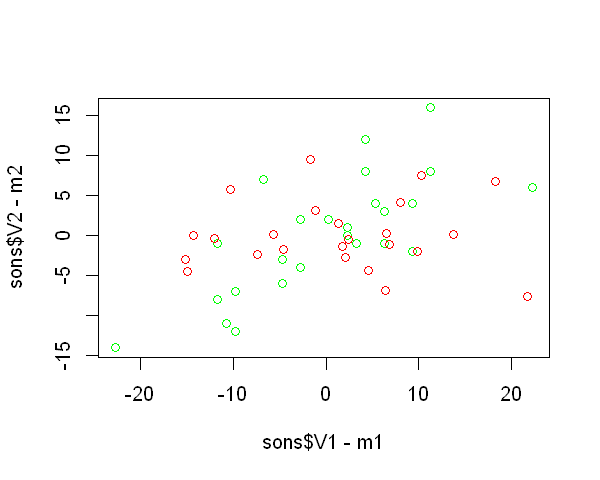

In [9]:
library(repr)
options(repr.plot.width=5, repr.plot.height=4)

plot(sons$V1-m1,sons$V2-m2, col="green")
points(z1,z2, col="red")

### Exercise  12.7  Rencher. 
Див. також повний код [тут](https://rpubs.com/aaronsc32/principal-component-analysis)
В наступній таблиці наведено результати  6 тестів   20 інженерів-студентів та 20 пілотів. Ми наведемо перші 6 значень таблиці; тут 1 означає, що мова йде про студента, а 2-про пілота. Тому ми зробимо групування данних за принципом, чи є людина, що бере участь в експерименті, студентом чи пілотом.

In [10]:
pilots <- read.table('T5_6_PILOT.DAT', 
        col.names =  c('Group', 'V1', 'V2','V3', 'V4', 'V5','V6'))
head(pilots)

Group,V1,V2,V3,V4,V5,V6
1,121,22,74,223,54,254
1,108,30,80,175,40,300
1,122,49,87,266,41,223
1,77,37,66,178,80,209
1,140,35,71,175,38,261
1,108,37,57,241,59,245


За допомогою функції  eigen отримаємо інфомацію про власті числа та власні вектори матриці коваріацій. Тут sum(diag(S)) це сумарна дисперсія, тобто сума власних значень. 

In [11]:
S <- cov(pilots[,2:7])
sum(diag(S))  
s.eigen <- eigen(S)
s.eigen

[1] 3442.199

eigen() decomposition
$values
[1] 1722.0424  878.3578  401.4386  261.0769  128.9051   50.3785

$vectors
            [,1]        [,2]        [,3]        [,4]        [,5]        [,6]
[1,] -0.21165160 -0.38949336  0.88819049  0.03082062 -0.04760343  0.10677164
[2,]  0.03883125 -0.06379320  0.09571590 -0.19128493 -0.14793191 -0.96269790
[3,] -0.08012946  0.06602004  0.08145863 -0.12854488  0.97505667 -0.12379748
[4,] -0.77552673  0.60795970  0.08071120  0.08125631 -0.10891968 -0.06295166
[5,]  0.09593926 -0.01046493  0.01494473  0.96813856  0.10919120 -0.20309559
[6,] -0.58019734 -0.68566916 -0.43426141  0.04518327  0.03644629 -0.03572141


Обчислимо пропорцію власних чисел до сумарної дисперсії $ \lambda_i/(\sum \lambda_i)$:

In [12]:
x<-c()
for (s in s.eigen$values) {
    x<-c(x,s / sum(s.eigen$values))
} 
print(x)

[1] 0.50027387 0.25517343 0.11662269 0.07584597 0.03744848 0.01463556


Намалюємо scree plot: 

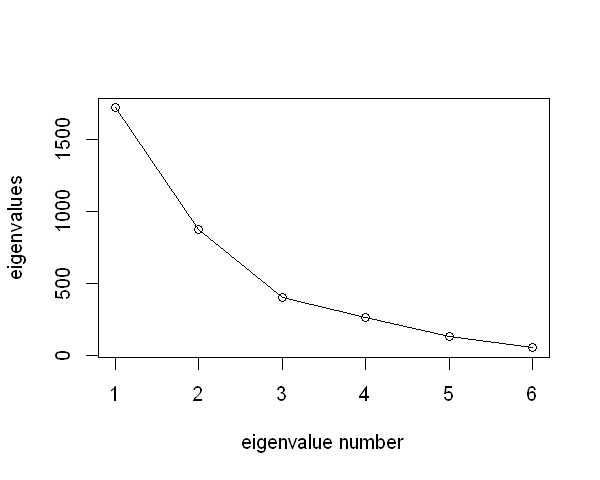

In [13]:
plot(s.eigen$values, xlab = 'eigenvalue number', ylab = 'eigenvalues')
lines(s.eigen$values)

З іншого боку, щоб отримати стандартні відхилення (тобто корені з власних чисел), можна застосувати фунції princomp та  prcomp до pilots[,2:7]. Отримаємо: 

In [14]:
princomp(pilots[,2:7])

Call:
princomp(x = pilots[, 2:7])

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6 
40.975497 29.264294 19.783897 15.954623 11.210822  7.008498 

 6  variables and  40 observations.

Функція prcomp() дає більш  повну інформацію, а саме: 

In [15]:
prcomp(pilots[,2:7])

Standard deviations (1, .., p=6):
[1] 41.497499 29.637102 20.035932 16.157875 11.353640  7.097781

Rotation (n x k) = (6 x 6):
           PC1         PC2         PC3         PC4         PC5         PC6
V1  0.21165160 -0.38949336  0.88819049 -0.03082062 -0.04760343 -0.10677164
V2 -0.03883125 -0.06379320  0.09571590  0.19128493 -0.14793191  0.96269790
V3  0.08012946  0.06602004  0.08145863  0.12854488  0.97505667  0.12379748
V4  0.77552673  0.60795970  0.08071120 -0.08125631 -0.10891968  0.06295166
V5 -0.09593926 -0.01046493  0.01494473 -0.96813856  0.10919120  0.20309559
V6  0.58019734 -0.68566916 -0.43426141 -0.04518327  0.03644629  0.03572141

Зауважимо, що наведені PC відрізняються від власних векторів знаком!

Для того, щоб отримати повну інформацію і про стандартні відхтлення, і про стандартні відхилення, можна використати функцію  summary():

In [16]:
pilots.pca <- prcomp(pilots[,2:7])
summary(pilots.pca)

Importance of components:
                           PC1     PC2     PC3      PC4      PC5     PC6
Standard deviation     41.4975 29.6371 20.0359 16.15788 11.35364 7.09778
Proportion of Variance  0.5003  0.2552  0.1166  0.07585  0.03745 0.01464
Cumulative Proportion   0.5003  0.7554  0.8721  0.94792  0.98536 1.00000

Виконаємо візуалізацію даних. Для цього спочатку зробимо нормування. 

In [17]:
sqrt(nrow(pilots))  # square root form the number of rows (experiments), i.e. 
pilots.pca$sdev[1:2]   #first 2 eigenvalues 
scaling <- pilots.pca$sdev[1:2] * sqrt(nrow(pilots)) 

[1] 6.324555

[1] 41.4975 29.6371

Знайдемо $ z_1 = (X- bar{X})' PC1/\sqrt{\lambda_1 n}$ та  $ z_2 = (X- bar{X})' PC2/\sqrt{\lambda_2 n}$: 

In [18]:
z1 <- rowSums(t(t(sweep(pilots[,2:7], 2 ,colMeans(pilots[,2:7]))) * s.eigen$vectors[,1] *(-1)) / scaling[1])
z2 <- rowSums(t(t(sweep(pilots[,2:7], 2, colMeans(pilots[,2:7]))) * s.eigen$vectors[,2]) / scaling[2])


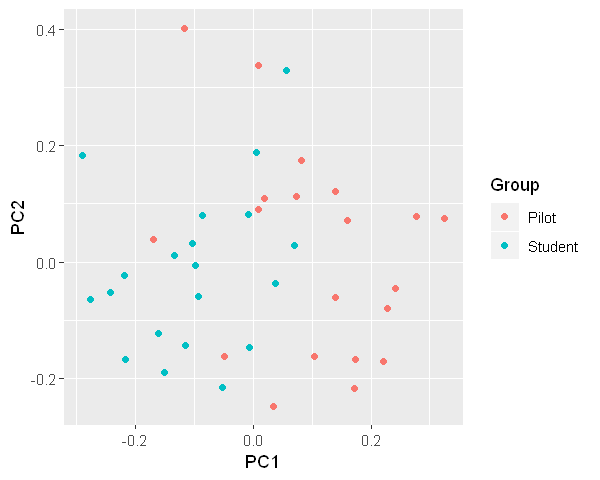

In [19]:
df <- data.frame(z1, z2, c(rep('Student', 20), rep('Pilot', 20)))
colnames(df) <- c('PC1', 'PC2', 'Group')

ggplot(df, aes(x=PC1, y=PC2, color=Group)) + 
  geom_point()

Як ми бачимо, дані більш-менш чітко розпадаються на дві групи. 

Саме такий результат можна отримати, використавши функцію autoplot

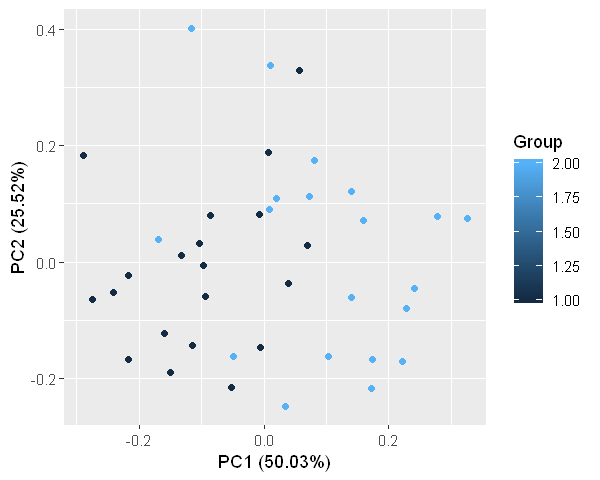

In [20]:
pca.plot <- autoplot(pilots.pca, data = pilots, colour = 'Group')
pca.plot